# AutoViML Tablular

Source: https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Titanic.ipynb

# Setup

In [1]:
!pip install kaggle
!pip install deep_autoviml

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deepauto



Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


# Fetch Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!mkdir '/root/.kaggle'
!chmod 600 '/content/drive/My Drive/297 2021/kaggle.json'
!cp '/content/drive/My Drive/297 2021/kaggle.json' '/root/.kaggle/'

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


# Loading Data

In [6]:
datapath = '/content/'
filename = 'train.csv'
sep = ','
train_datafile = datapath+filename
target = 'Survived'

In [7]:
# load dataset. 
train_data = pd.read_csv(train_datafile, header=0, sep=sep)
train = train_data.head(int(train_data.shape[0] * .7))
print(train.shape)
train.head(1)

(623, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [8]:
test = train_data.tail(int(train_data.shape[0] * .3))
print(train.shape, test.shape)
test.head(1)
test.to_csv("final_test.csv", index=False)

(623, 12) (267, 12)


In [9]:
!ls

deep_autoviml				  final_test.csv	 test.csv
deep_autoviml_taxi_auto_model_after.png   gender_submission.csv  train.csv
deep_autoviml_taxi_auto_model_before.png  sample_data
drive					  taxi


# Model

In [10]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "taxi"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = 

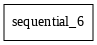

Model plot saved in file: deep_autoviml_taxi_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.3026315789473684}
    original datasize = 892, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 1000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train 

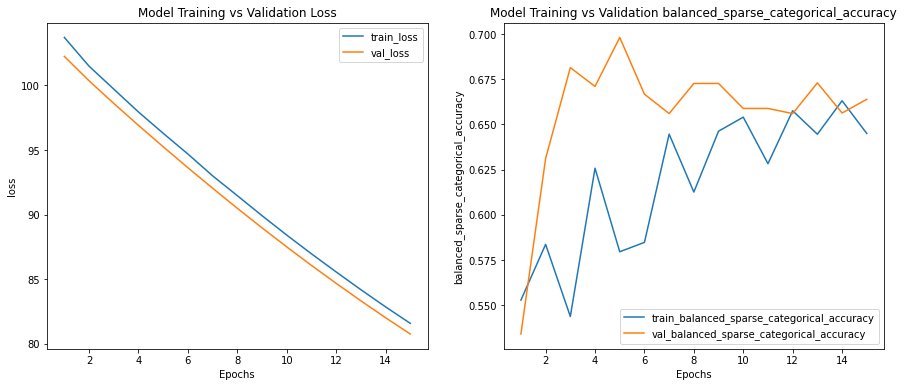

Time taken to train model (in mins) = 1
    Stopped epoch = 5
Held out data actuals shape: (96,)
    samples from label: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

Held out predictions shape:(96,)
    Sample predictions: [1 1 0 1 0 0 0 0 1 1]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Survived
#################################################################


    Accuracy          = 70.8%
    Balanced Accuracy = 69.4%
    Precision         = 64.9%
    Average Precision = 69.7%
    Recall            = 61.5%
    F1 Score          = 63.2%
    ROC AUC           = 78.9%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 8.5279244e-05
    set learning rate using best model: 8.5279244e-05
    max epochs for training = 5

Model not being saved since save_model_flag set to False...
6029

Saving vocab dictionary using pickle in taxi/auto/model_2021_10_30-07_07_29/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in taxi/auto/model_2021_10_30-07_07_29/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in taxi/auto/model_2021_10_30-07_07_29/artifacts/var_df.pickle...will take time...
    Saved pickle file in taxi/auto/model_2021_10_30-07_07_29/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time taken

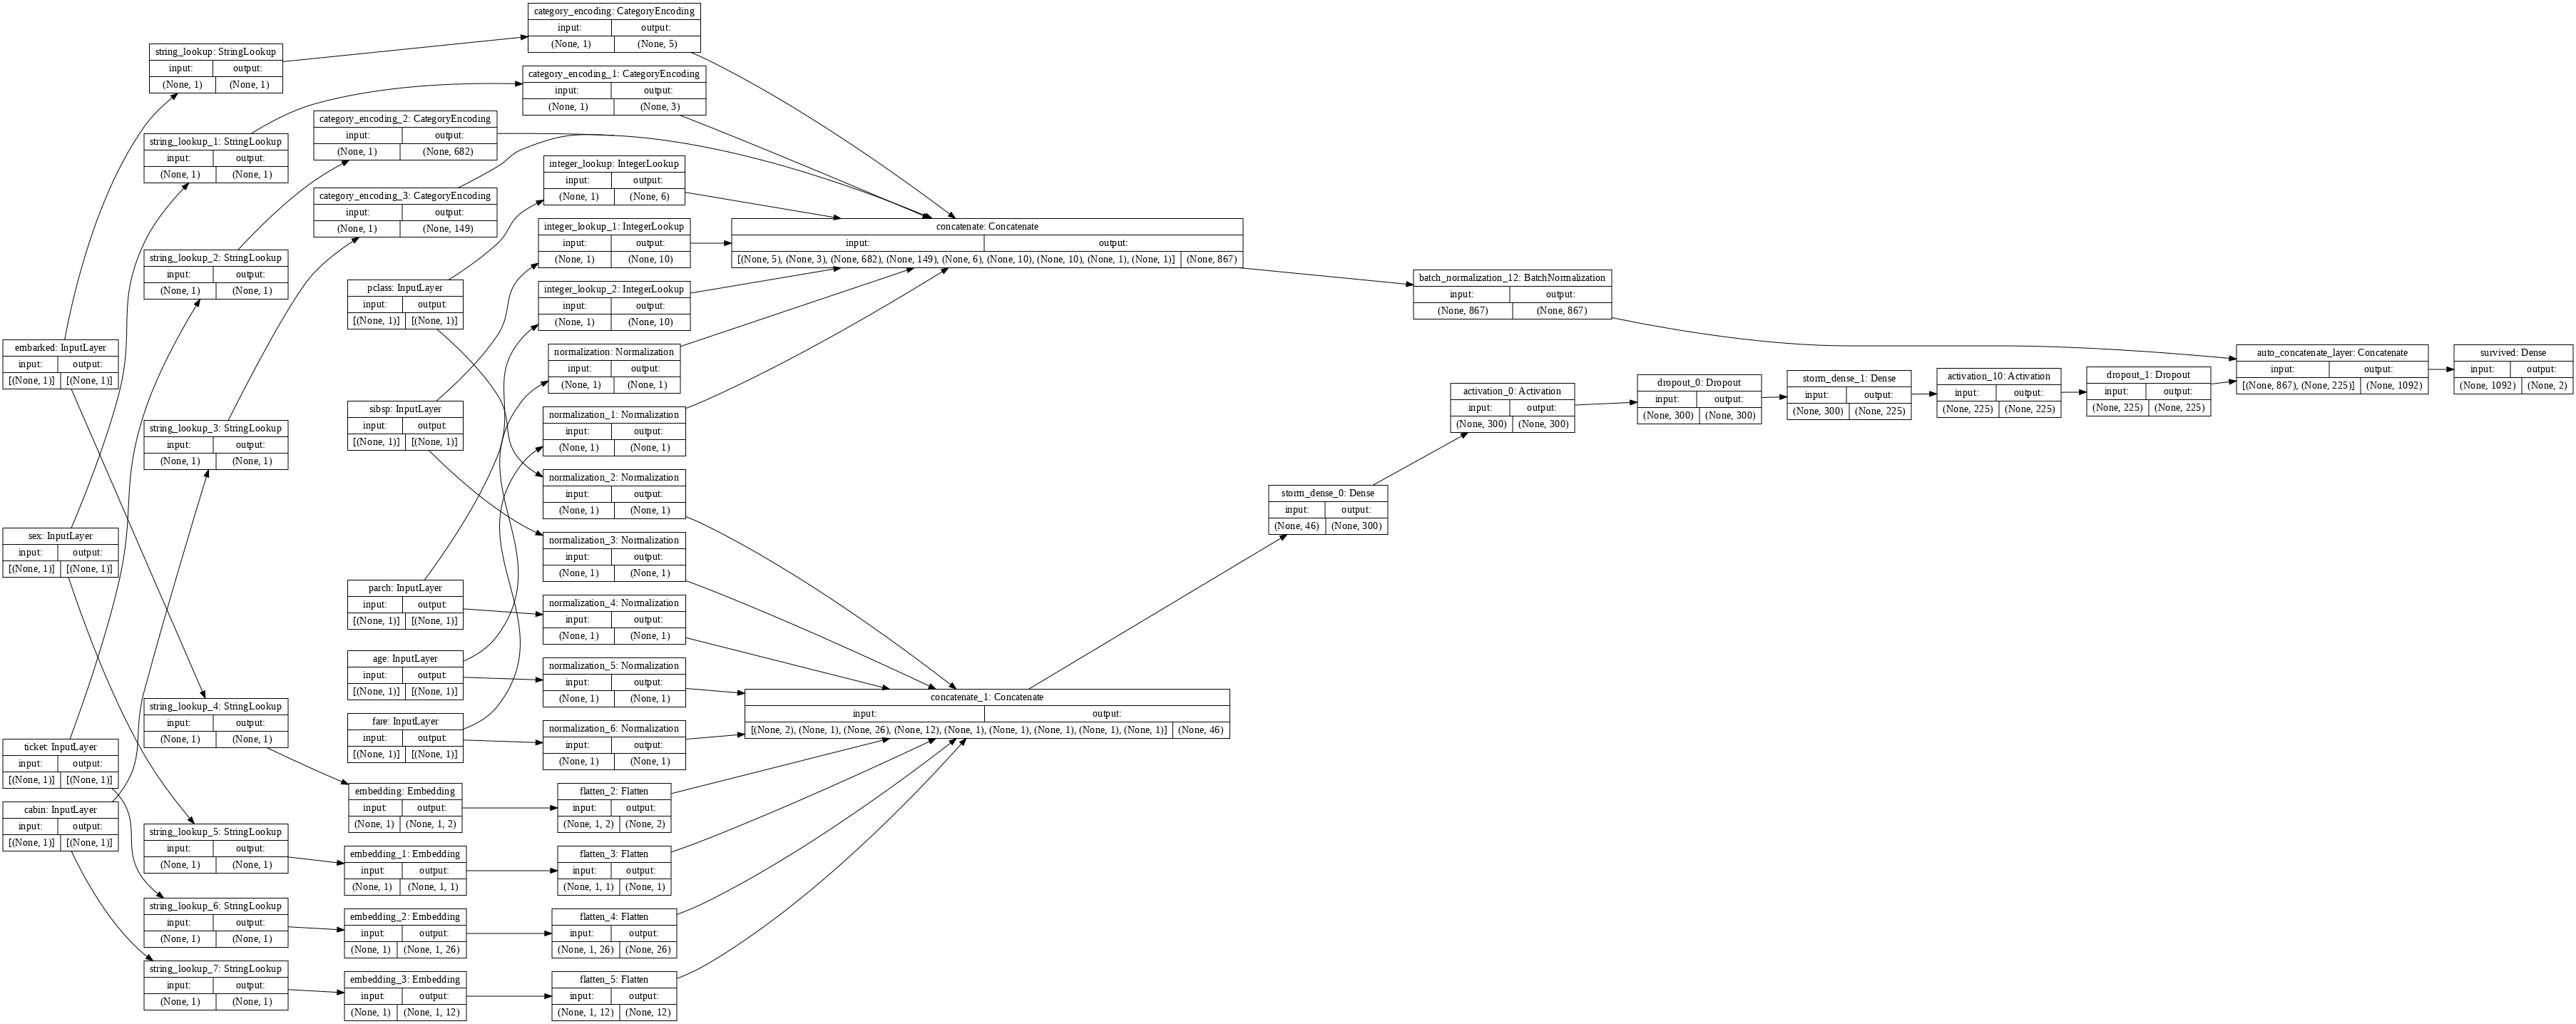

Model plot saved in file: deep_autoviml_taxi_auto_model_after.png


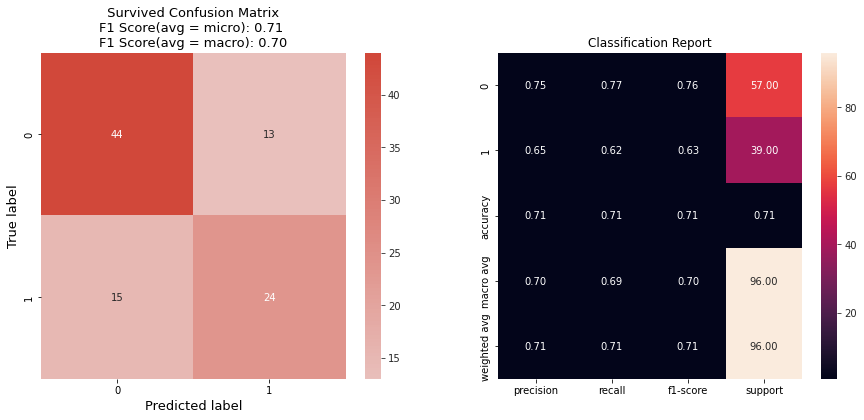

In [11]:
model, cat_vocab_dict = deepauto.fit(train_datafile, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=1)

# Evaluation

In [12]:
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

In [13]:
predictions = deepauto.predict(model, project_name, test_dataset="final_test.csv",
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7fc468b8bbd0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7fc468b8bbd0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 267
Alert! Modified column names to satisfy rules for column names in Tensorflow...
Alert! cabin has 2 mixed data types: Index([<class 'float'>, <class 'str'>], dtype='object') 
Alert! embarked has 2 mixed data types: Index([<class 'str'>, <class 'float'>], dtype='object') 
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        2 variable(s) to be removed since they were ID or low-information variabl

In [16]:
y_preds = predictions[1]
y_test = test[target].values

In [17]:
print('Balanced Accuracy = %0.1f%%' %(100*balanced_accuracy_score(y_test, y_preds)))
print(classification_report(y_test, y_preds))

Balanced Accuracy = 69.0%
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       171
           1       0.62      0.57      0.60        96

    accuracy                           0.72       267
   macro avg       0.70      0.69      0.69       267
weighted avg       0.72      0.72      0.72       267

